In [1]:
from astropy.io import fits, ascii
from astropy.table import Table, Column, hstack
from astropy.time import Time
import numpy as np
import rafias_lib as rl
import pdb, glob, matplotlib, string
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =  (10, 8)

## General

In [2]:
def time_generator(filenames):
    time = []
    for fname in filenames:
        hdu = fits.open(fname)
        header = hdu[0].header
        date1 = string.split(string.replace(header['DATE'], '/', '-'), '-')
        date = date1[2] + '-' + date1[0] + '-' + date1[1]
        time_str = date +'T'+ header['STARTEXP']
        time.append(Time(time_str).jd)
    return time

In [3]:
def flux_generator(filenames, xcen = [80.0], ycen = [105.0], h = 110.0, w = 160.0, red = True, red2 = False):
    flux = []
    for fname in filenames:
        test_im = rl.test_image(fname, r = red, r2 = red2, Time = False)
        image2d = test_im[0]
        mask = test_im[3]
        flux1, ignore = rl.photometry(image2d, xcen, ycen, mask, shape = "Rect", ht = h, wid = w)
        flux.append(flux1)
    return flux

# Run 95

## S1

In [2]:
s1_filenames = glob.glob('/data/Local/Run95/More_Subarray/Run95_subarray_1mi*.S01.fits')
len(s1_filenames)

150

In [18]:
s1_times = time_generator(s1_filenames)
len(s1_times)

150

In [34]:
s1_fluxes = flux_generator(s1_filenames)
s1_med_flux = np.median(s1_fluxes)
s1_norm_flux = s1_fluxes/s1_med_flux
len(s1_norm_flux)

150

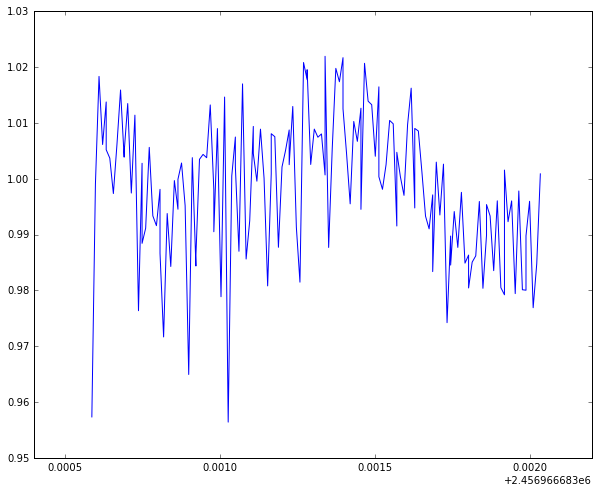

In [35]:
s1_plot = plt.plot(s1_times, s1_norm_flux)

## S2

In [21]:
s2_filenames = glob.glob('/data/Local/Run95/More_Subarray/Run95_subarray_1mi*.S02.fits')
len(s2_filenames)

150

In [22]:
s2_times = time_generator(s2_filenames)
len(s2_times)

150

In [36]:
s2_fluxes = flux_generator(s2_filenames)
s2_med_flux = np.median(s2_fluxes)
s2_norm_flux = s2_fluxes/s2_med_flux
len(s2_norm_flux)

150

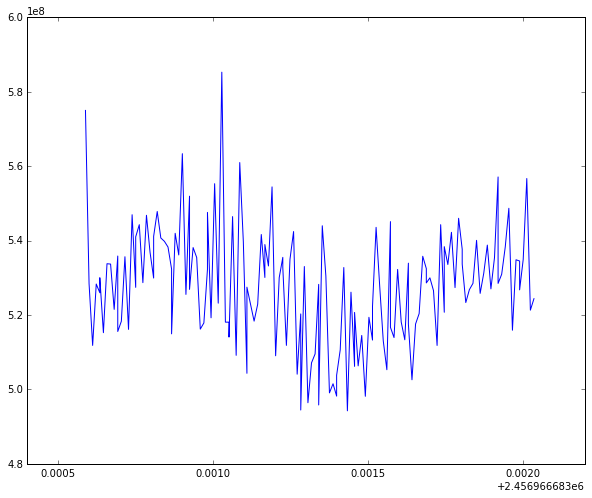

In [37]:
s2_plot = plt.plot(s2_times, s2_fluxes)

## S3

In [38]:
s3_filenames = glob.glob('/data/Local/Run95/More_Subarray/Run95_subarray_1mi*.S03.fits')
len(s3_filenames)

150

In [39]:
s3_times = time_generator(s3_filenames)
len(s3_times)

150

In [40]:
s3_fluxes = flux_generator(s3_filenames)
s3_med_flux = np.median(s3_fluxes)
s3_norm_flux = s3_fluxes/s3_med_flux
len(s3_norm_flux)

150

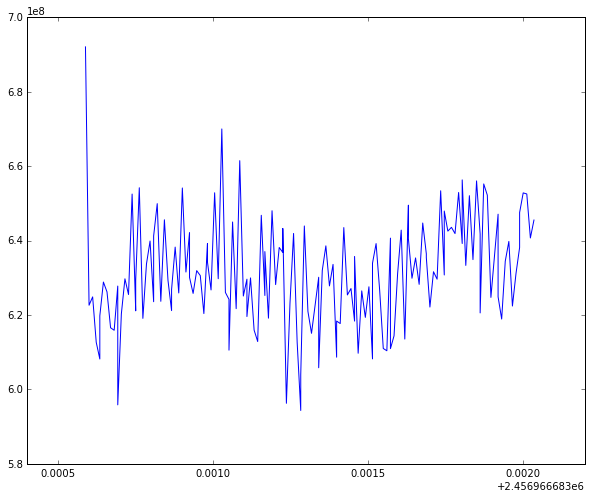

In [41]:
s3_plot = plt.plot(s3_times, s3_fluxes)

## S4

In [42]:
s4_filenames = glob.glob('/data/Local/Run95/More_Subarray/Run95_subarray_1mi*.S04.fits')
len(s4_filenames)

150

In [43]:
s4_times = time_generator(s4_filenames)
len(s4_times)

150

In [44]:
s4_fluxes = flux_generator(s4_filenames)
s4_med_flux = np.median(s4_fluxes)
s4_norm_flux = s4_fluxes/s4_med_flux
len(s4_norm_flux)

150

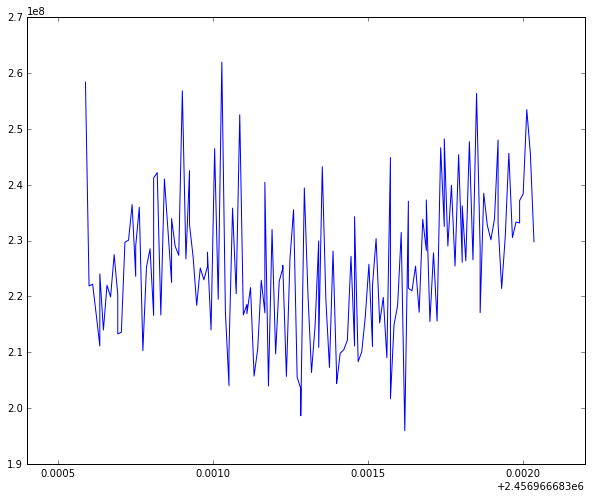

In [45]:
s4_plot = plt.plot(s4_times, s4_fluxes)

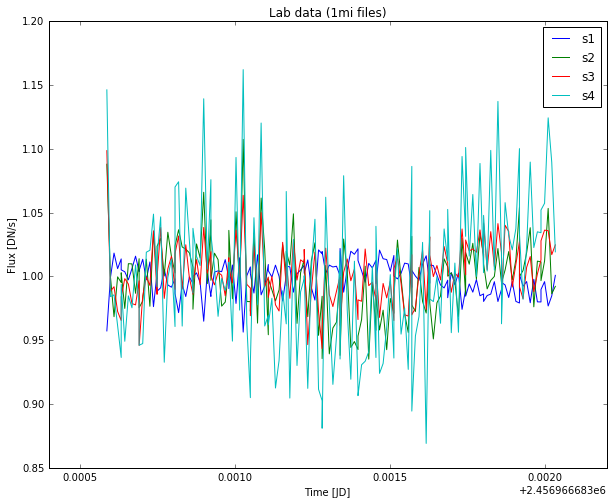

In [49]:
for x in range(1,5):
    plt.plot(globals()['s%s_times' % x],globals()['s%s_norm_flux' % x], label = "s%i" % x)
    plt.legend(loc = "best")
    plt.xlabel('Time [JD]')
    plt.ylabel('Flux [DN/s]')
    plt.title('Lab data (1mi files)')

# Run104

## S2

In [37]:
s2_filenames = np.sort(glob.glob('/data/Local/Run104/More_subarray/Run104_subarray_1mi*.S02.fits'))[20:4470]
len(s2_filenames)

4450

In [38]:
s2_times = time_generator(s2_filenames)
len(s2_times)

4450

In [39]:
s2_fluxes = flux_generator(s2_filenames)
s2_med_flux = np.median(s2_fluxes)
s2_norm_flux = s2_fluxes/s2_med_flux
len(s2_norm_flux)

4450

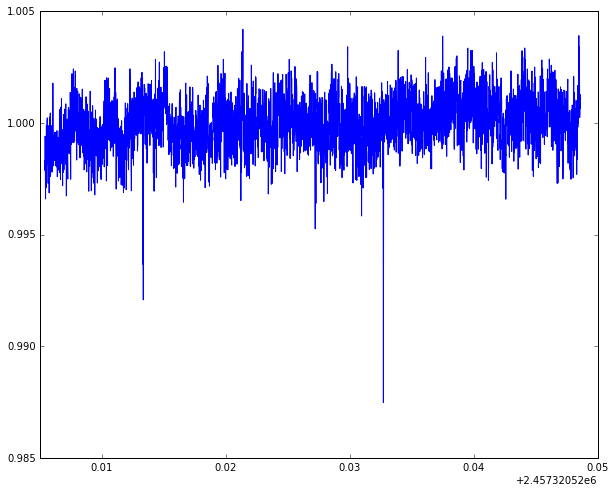

In [40]:
s2_plot = plt.plot(s2_times, s2_norm_flux)

## S3

In [41]:
s3_filenames = np.sort(glob.glob('/data/Local/Run104/More_subarray/Run104_subarray_1mi*.S03.fits'))[20:4470]
len(s3_filenames)

4450

In [42]:
s3_times = time_generator(s3_filenames)
len(s3_times)

4450

In [43]:
s3_fluxes = flux_generator(s3_filenames)
s3_med_flux = np.median(s3_fluxes)
s3_norm_flux = s3_fluxes/s3_med_flux
len(s3_norm_flux)

4450

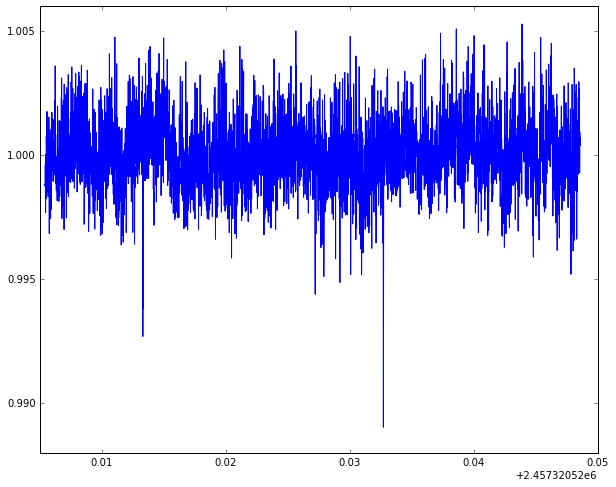

In [44]:
s3_plot = plt.plot(s3_times, s3_norm_flux)

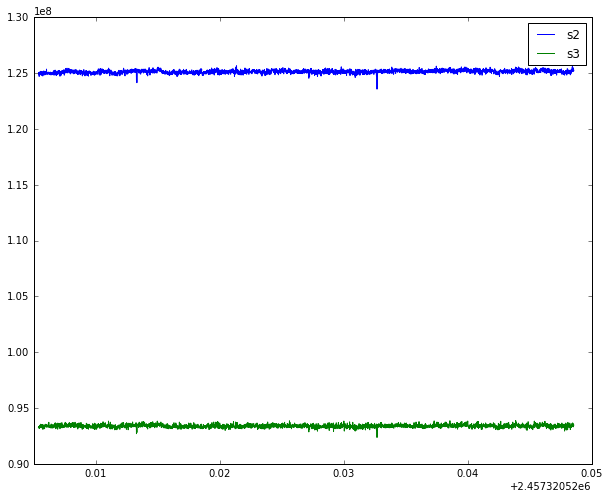

In [45]:
plt.plot(s2_times, s2_fluxes, label = 's2')
plt.plot(s3_times, s3_fluxes, label = 's3')
plt.legend(loc ='best')

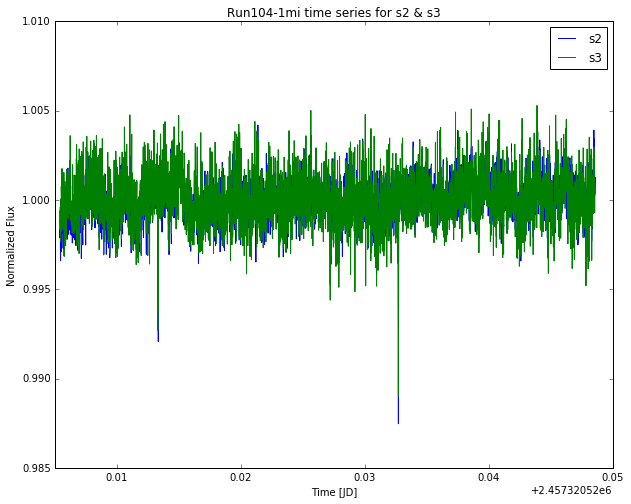

In [47]:
plt.plot(s2_times, s2_norm_flux, label = 's2')
plt.plot(s3_times, s3_norm_flux, label = 's3')
plt.legend(loc ='best')
plt.xlabel('Time [JD]')
plt.ylabel('Normalized Flux')
plt.title('Run104-1mi time series for s2 & s3')

# Run112

In [6]:
s1_filenames = np.sort(glob.glob('/data1/Local/Run112/Run112/Subarrays6/Illum/Run112_sub6_illum_hi*.S01.fits'))
s2_filenames = np.sort(glob.glob('/data1/Local/Run112/Run112/Subarrays6/Illum/Run112_sub6_illum_hi*.S02.fits'))
s3_filenames = np.sort(glob.glob('/data1/Local/Run112/Run112/Subarrays6/Illum/Run112_sub6_illum_hi*.S03.fits'))
len(s1_filenames), len(s2_filenames), len(s3_filenames)

(300, 300, 300)

In [7]:
s1_times = time_generator(s1_filenames)
s2_times = time_generator(s2_filenames)
s3_times = time_generator(s3_filenames)

In [8]:
s1_fluxes = flux_generator(s1_filenames)
s2_fluxes = flux_generator(s2_filenames)
s3_fluxes = flux_generator(s3_filenames)

In [9]:
s1_norm_flux = s1_fluxes/np.median(s1_fluxes)
s2_norm_flux = s2_fluxes/np.median(s2_fluxes)
s3_norm_flux = s3_fluxes/np.median(s3_fluxes)

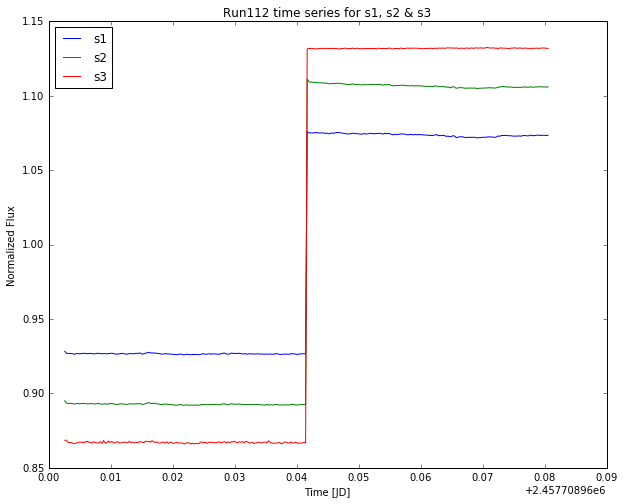

In [19]:
plt.plot(s1_times, s1_norm_flux, label = 's1')
plt.plot(s2_times, s2_norm_flux, label = 's2')
plt.plot(s3_times, s3_norm_flux, label = 's3')
# plt.axvline(x = 0.0415+2457708.96)
plt.legend(loc ='best')
plt.xlabel('Time [JD]')
plt.ylabel('Normalized Flux')
plt.title('Run112 time series for s1, s2 & s3')

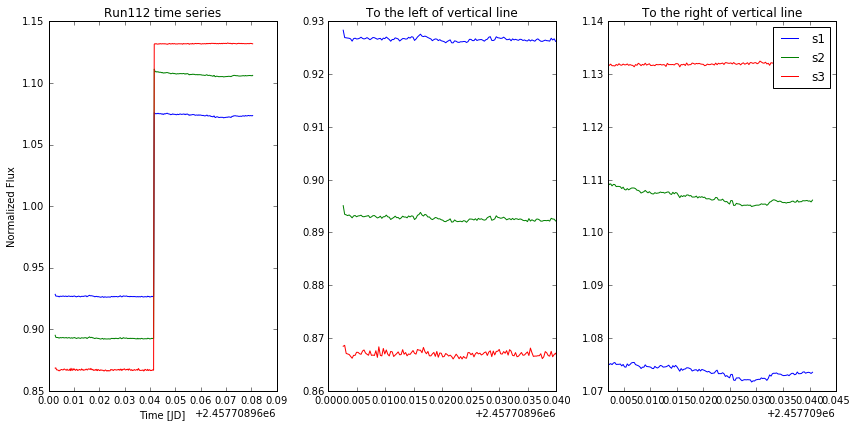

In [27]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.plot(s1_times, s1_norm_flux, label = 's1')
plt.plot(s2_times, s2_norm_flux, label = 's2')
plt.plot(s3_times, s3_norm_flux, label = 's3')
plt.title('Run112 time series')
plt.xlabel('Time [JD]')
plt.ylabel('Normalized Flux')

plt.subplot(1,3,2)
plt.plot(s1_times, s1_norm_flux, label = 's1')
plt.plot(s2_times, s2_norm_flux, label = 's2')
plt.plot(s3_times, s3_norm_flux, label = 's3')
plt.xlim(2457708.96, 0.04+2457708.96)
plt.ylim(0.86, 0.93)
plt.title('To the left of vertical line')

plt.subplot(1,3,3)
plt.plot(s1_times, s1_norm_flux, label = 's1')
plt.plot(s2_times, s2_norm_flux, label = 's2')
plt.plot(s3_times, s3_norm_flux, label = 's3')
plt.xlim(0.042+2457708.96, 0.085+2457708.96)
plt.ylim(1.07, 1.14)
plt.title('To the right of vertical line')

plt.legend(loc ='best')
plt.tight_layout()